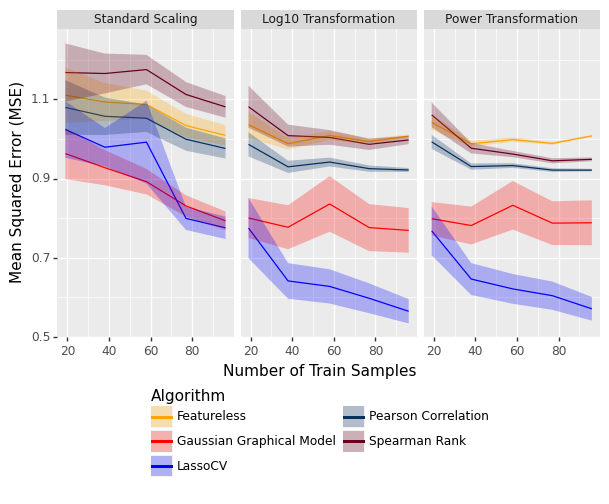

In [2]:

import plotnine as p9
import pandas as pd
import plotnine.options as p9options

root_results_dir = "/projects/genomic-ml/da2343/ml_project_1/data_transf_comp/results"
error_df1 = pd.read_csv(f"{root_results_dir}/data_trans1_combined_results.csv")
error_df2 = pd.read_csv(f"{root_results_dir}/data_trans2_combined_results.csv")
error_df3 = pd.read_csv(f"{root_results_dir}/data_trans3_combined_results.csv")

# combine the dataframes
error_df = pd.concat([error_df1,error_df2, error_df3], ignore_index=True)

# define the order of the facets
dataset_order = ['Standard Scaling', 'Log10 Transformation', 'Power Transformation']
# p9options.figure_size = (5.5, 3)
p9options.figure_size = (7, 4)
colors = ["orange", "red", "blue", "#053061", "#67001f"]

# Reorder the levels of the Dataset variable
error_df['Dataset'] = pd.Categorical(error_df['Dataset'], categories=dataset_order, ordered=True)

gg = p9.ggplot(error_df) +\
p9.aes(x='# of Train Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset') +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(values=colors) +\
p9.scale_color_manual(values=colors) +\
p9.xlab("Number of Train Samples") +\
p9.ylab("Mean Squared Error (MSE)") +\
p9.theme(legend_position="bottom", legend_box_spacing=0.3)+\
p9.guides(fill=p9.guide_legend(ncol = 2)) 

# show the plot
print(gg)


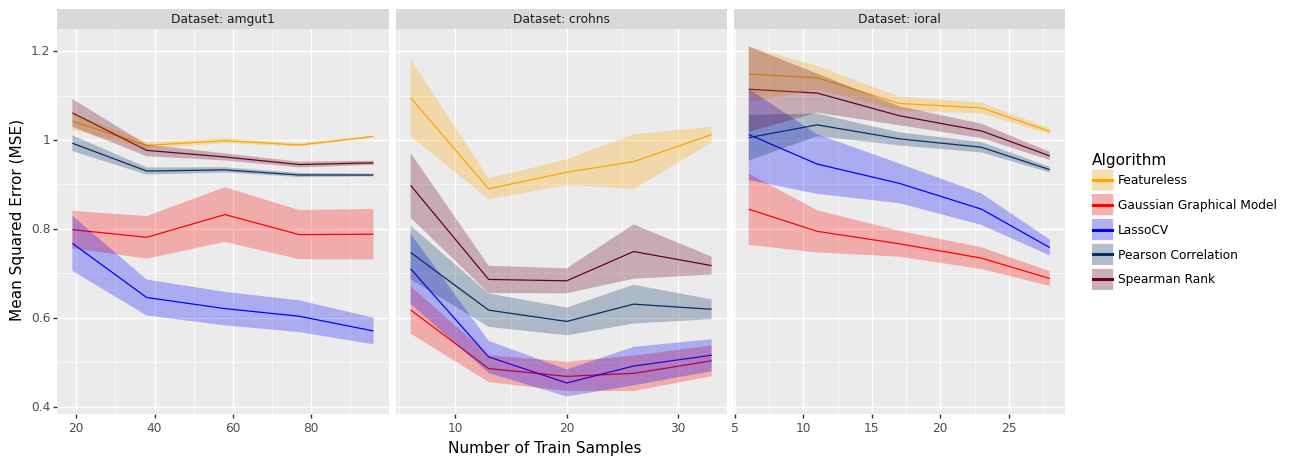

In [9]:
error_df1 = pd.read_csv(f"{root_results_dir}/2023-04-03_15:47_results.csv")
error_df2 = pd.read_csv(f"{root_results_dir}/2023-04-03_16:07_results.csv")
# combine the dataframes
error_df = pd.concat([error_df1,error_df2], ignore_index=True)

# colors = ["#a50026", "#fdae61", "#ffffbf", "#abd9e9", "#313695"]
colors = [ "orange", "red", "blue", "#053061", "#67001f"]

dataset_list = error_df["Dataset"].unique().tolist()
main_test_error_list = []
for dataset in dataset_list:
    test_error_df_list = []
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Train Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Train Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].var() * 0.4
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            test_error_dict = {'# of Train Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    # save the dataframe
    # remove the index column
    my_combined_results_df = my_combined_results_df.drop(columns=['index'])
    main_test_error_list.append(my_combined_results_df)
    
# combine all the dataframes
combined_results_df = pd.concat(main_test_error_list).reset_index()

# define the order of the facets
dataset_order = ['amgut1', 'crohns', 'ioral']
p9options.figure_size = (5.8, 3)
p9options.figure_size = (13, 5)
colors = ["orange", "red", "blue", "#053061", "#67001f"]

# Reorder the levels of the Dataset variable
combined_results_df['Dataset'] = pd.Categorical(combined_results_df['Dataset'], categories=dataset_order, ordered=True)

gg = p9.ggplot(combined_results_df) +\
p9.aes(x='# of Train Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset', scales='free_x', labeller= 'label_both' ) +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(values=colors) +\
p9.scale_color_manual(values=colors) +\
p9.xlab("Number of Train Samples") +\
p9.ylab("Mean Squared Error (MSE)") 
# p9.theme(legend_position="bottom", legend_box_spacing=0.3)+\
# p9.guides(fill=p9.guide_legend(ncol = 2)) 
# show the plot
print(gg)

In [35]:
import plotnine as p9
import pandas as pd
import plotnine.options as p9options

# data = "glne007"
# dataset_name = f"{data}_log_standard_scaled_results"
# date_time = "2023-02-01_20:47"
# date_time = "2023-02-07_13:49"
# date_time = "2023-02-13_09:09"
# date_time = "2023-02-13_18:47"
# date_time = "2023-02-14_13:21"

# date_time = "2023-02-16_16:57"
# date_time = "2023-02-16_19:53"

# date_time = "2023-03-05_19:06"
# date_time = "2023-04-01_17:00"
# date_time = "2023-04-01_17:00"


# Below is the test of data transformation
# date_time = "2023-03-06_16:01"
# date_time = "2023-03-06_11:53"


# New test graph output
# date_time = "2023-05-29_09:54"
date_time = "2023-05-29_10:20"
date_time = "2023-05-29_14:34"
error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
# remove when the `Dataset` column is `amgut1_log1_standard_scaled`
error_df = error_df[error_df["Dataset"] != "amgut1_log1_standard_scaled"]
error_df = error_df[error_df["Dataset"] != "amgut2_log1_standard_scaled"]
print(error_df)

       Mean Squared Error  Root Mean Squared Error  FoldID  \
30               1.020331                 1.010114       0   
31               0.971802                 0.985800       0   
32               0.893934                 0.945481       0   
33               0.675945                 0.822159       0   
34               1.060458                 1.029785       0   
...                   ...                      ...     ...   
61930            1.059869                 1.029500       2   
61931            0.841458                 0.917310       2   
61932            0.938546                 0.968786       2   
61933            0.529350                 0.727565       2   
61934            0.888256                 0.942473       2   

       # of Train Samples Dataset  Index of Predicted Column  \
30                     20  amgut2                         30   
31                     20  amgut2                         30   
32                     20  amgut2                         30   

In [ ]:
# Get unique values as list from column name `Dataset`
# colors = ["#a50026", "#fdae61", "#ffffbf", "#abd9e9", "#313695"]
colors = [ "orange", "red", "blue", "#053061", "#67001f"]

dataset_list = error_df["Dataset"].unique().tolist()
for dataset in dataset_list:
    test_error_df_list = []
    # remove multi
    # Get new dataframe with only the dataset
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Train Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Train Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            # Get new dataframe with only the dataset and n_sample
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            # std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.015
            std_mse = sub_filtered_csv['Mean Squared Error'].var() * 0.4
            # Mean absolute deviation (MAD) instead of std
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            # R2 Score manipulations
            # sub_filtered_csv.loc[sub_filtered_csv['R2 Score'] < 0, 'R2 Score'] = 0
            # mean_r2 = sub_filtered_csv['R2 Score'].mean()
            # var_r2 = sub_filtered_csv['R2 Score'].var() 
            # r2_min = mean_r2 - var_r2
            # r2_max = mean_r2 + var_r2
            
            test_error_dict = {'# of Train Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    # save the dataframe
    # remove the index column
    my_combined_results_df = my_combined_results_df.drop(columns=['index'])
    my_combined_results_df.to_csv(f"{date_time}_combined_results.csv", index=False)
    
    gg = p9.ggplot(my_combined_results_df) +\
    p9.aes(x='# of Train Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
    p9.facet_wrap('~Dataset') +\
    p9.geom_line( p9.aes(color = "Algorithm") ) +\
    p9.geom_ribbon(alpha = 0.27) +\
    p9.scale_fill_manual(values=colors) +\
    p9.scale_color_manual(values=colors) +\
    p9.ggtitle(f"Test Error for {dataset} Dataset") +\
    p9.xlab("No of Train Samples") +\
    p9.ylab("Mean Squared Error (MSE)")
    # show the plot
    print(gg)
    # TODO: Uncomment to save the plot
    # gg.save(f"{dataset}_updated_graph.png")
    

In [40]:
error_df

,Mean Squared Error,Root Mean Squared Error,FoldID,# of Train Samples,Dataset,Index of Predicted Column,Algorithm
30,1.020331,1.010114,0,20,Yeo-Johnson Transformation,30,Featureless
31,0.971802,0.985800,0,20,Yeo-Johnson Transformation,30,Pearson
32,0.893934,0.945481,0,20,Yeo-Johnson Transformation,30,Spearman
33,0.675945,0.822159,0,20,Yeo-Johnson Transformation,30,LASSO
34,1.060458,1.029785,0,20,Yeo-Johnson Transformation,30,GGM
...,...,...,...,...,...,...,...
61930,1.059869,1.029500,2,98,Yeo-Johnson Transformation,129,Featureless
61931,0.841458,0.917310,2,98,Yeo-Johnson Transformation,129,Pearson
61932,0.938546,0.968786,2,98,Yeo-Johnson Transformation,129,Spearman
61933,0.529350,0.727565,2,98,Yeo-Johnson Transformation,129,LASSO


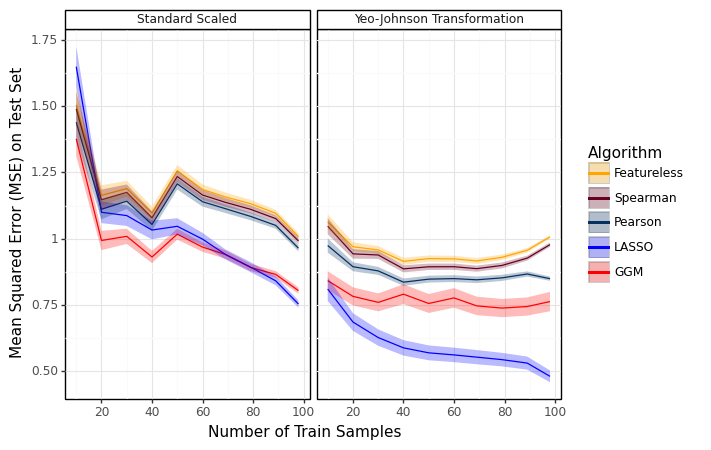

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: 2023-05-29_14:34_results.png


In [49]:
import plotnine as p9
import pandas as pd
import plotnine.options as p9options

date_time = "2023-05-29_10:20"
date_time = "2023-05-29_14:34"

error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
error_df = error_df[error_df["Dataset"] != "amgut1_log1_standard_scaled"]
error_df = error_df[error_df["Dataset"] != "amgut2_log1_standard_scaled"]
# change Pearson Correlation in the Algorithm column to Pearson
error_df["Algorithm"] = error_df["Algorithm"].replace("Pearson Correlation", "Pearson")
error_df["Algorithm"] = error_df["Algorithm"].replace("Spearman Rank", "Spearman")
error_df["Algorithm"] = error_df["Algorithm"].replace("LassoCV", "LASSO")
error_df["Algorithm"] = error_df["Algorithm"].replace("Gaussian Graphical Model", "GGM")

error_df["Dataset"] = error_df["Dataset"].replace("amgut2", "Yeo-Johnson Transformation")
error_df["Dataset"] = error_df["Dataset"].replace("amgut2_standard_scaled", "Standard Scaled")

# Get unique values as list from column name `Dataset`
# colors = ["#a50026", "#fdae61", "#ffffbf", "#abd9e9", "#313695"]
colors = [ "orange", "#67001f", "#053061", "blue", "red" ]


my_combined_results_df_list = []
dataset_list = error_df["Dataset"].unique().tolist()
for dataset in dataset_list:
    test_error_df_list = []
    # remove multi
    # Get new dataframe with only the dataset
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Train Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Train Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            # Get new dataframe with only the dataset and n_sample
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.09 if dataset == "Yeo-Johnson Transformation" else sub_filtered_csv['Mean Squared Error'].std() * 0.02
            # Mean absolute deviation (MAD) instead of std
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            # R2 Score manipulations
            # sub_filtered_csv.loc[sub_filtered_csv['R2 Score'] < 0, 'R2 Score'] = 0
            # mean_r2 = sub_filtered_csv['R2 Score'].mean()
            # var_r2 = sub_filtered_csv['R2 Score'].var() 
            # r2_min = mean_r2 - var_r2
            # r2_max = mean_r2 + var_r2
            
            test_error_dict = {'# of Train Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    my_combined_results_df_list.append(my_combined_results_df)
    
gg = p9.ggplot(pd.concat(my_combined_results_df_list).reset_index()) +\
p9.aes(x='# of Train Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset') +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors) +\
p9.scale_color_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors) +\
p9.theme(
            axis_text=p9.element_text(size=0.8*11),
            legend_key=p9.element_rect(color='#CCCCCC'),
            panel_background=p9.element_rect(fill='white'),
            panel_border=p9.element_rect(fill='None', color='black'),
            panel_grid_major=p9.element_line(color='#E5E5E5', size=0.8),
            panel_grid_minor=p9.element_line(color='#FAFAFA', size=1),
            strip_background=p9.element_rect(
                fill='white',
                color='black',
                size=1
            )
) +\
p9.scale_x_continuous(breaks=[0, 20, 40, 60, 80, 100]) +\
p9.xlab("Number of Train Samples") +\
p9.ylab("Mean Squared Error (MSE) on Test Set")
# show the plot
print(gg)
    # TODO: Uncomment to save the plot
p9.ggsave(gg, filename=f"{date_time}_results.png", dpi=1000)

    

In [ ]:
# Get unique values as list from column name `Dataset`
dataset_list = error_df["Dataset"].unique().tolist()
for dataset in dataset_list:
    test_error_df_list = []
    # Get new dataframe with only the dataset
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Train Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Train Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            # Get new dataframe with only the dataset and n_sample
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].var()
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            # R2 Score manipulations
            # sub_filtered_csv.loc[sub_filtered_csv['R2 Score'] < 0, 'R2 Score'] = 0
            mean_r2 = sub_filtered_csv['R2 Score'].mean()
            var_r2 = sub_filtered_csv['R2 Score'].var() 
            r2_min = mean_r2 - var_r2
            r2_max = mean_r2 + var_r2
            
            test_error_dict = {'# of Train Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            'R2 Score': mean_r2,
                            'ymin' : r2_min,
                            'ymax' : r2_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    
    gg = p9.ggplot(my_combined_results_df) +\
    p9.aes(x='# of Train Samples', y='R2 Score', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
    p9.facet_wrap('~Dataset') +\
    p9.geom_line( p9.aes(color = "Algorithm") ) +\
    p9.geom_ribbon(alpha = 0.15) +\
    p9.scale_fill_manual(values=["green", "blue", "red", "orange", "purple", "black"]) +\
    p9.scale_color_manual(values=["green",  "blue", "red", "orange", "purple", "black"]) +\
    p9.ggtitle(f"Multi-Col Test Error for {dataset} Dataset") +\
    p9.xlab("# of Train Samples")
    # show the plot
    print(gg)
    # TODO: Uncomment to save the plot
    # gg.save(f"{dataset}_updated_graph.png")
    
    